## State and Local Government Expenditures on Police Protection in the U.S., 2000-2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Chardet was used to find out why I was having issues reading in the csv files

# import chardet
# with open('Assets/slgeppus0017t01.csv', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result

# Only going to look at Real (inflation-adjusted) and not the Nominal (not inflation adjusted) data.  Will also not look at the comparisons to GDP.  

### Table 1. Real (inflation-adjusted) state and local government expenditures on police protection in the U.S., 2000-2017 (slgeppus0017t01.csv)

In [3]:
t01df = pd.read_csv('data/slgeppus0017/slgeppus0017t01.csv', engine='python', skiprows=10, skipfooter=2, encoding='Windows-1252')

In [4]:
t01df.dtypes

Year                                                                                           int64
Real police-protection expenditures (thousands of 2012 dollars; using GDP price deflator)     object
Real direct general expenditures (thousands of 2012 dollars; using GDP price deflator)        object
U.S. population                                                                               object
Real police-protection expenditures per capita                                                object
Real direct general expenditures per capita                                                   object
Police-protection expenditures as a percent of direct general expenditures                   float64
Unnamed: 7                                                                                    object
dtype: object

#### Rename column names and manipulate string data to convert to integers and floats.

Real police-protection expenditures (thousands of 2012 dollars; using GDP price deflator):   RealExpend <br>
Real direct general expenditures (thousands of 2012 dollars; using GDP price deflator):  RealDirectGenExpend <br>
U.S. population:  USPop <br>
Real police-protection expenditures per capita:  RealExpendPerCapita <br>
Real direct general expenditures per capita:  RealDirectGenExpendPerCapita <br>
Police-protection expenditures as a percent of direct general expenditures:  %ExpendofDirGDP <br>

Will drop column 8 (Unnamed: 7) as it is only used to display a % sign

In [5]:
# change column names

colnames1 = {'Year': 'Year',
'Real police-protection expenditures (thousands of 2012 dollars; using GDP price deflator)': 'RealExpend(S&L)',
'Real direct general expenditures (thousands of 2012 dollars; using GDP price deflator)': 'RealDirectGenExpend(S&L)',
'U.S. population': 'USPop',
'Real police-protection expenditures per capita': 'RealExpendPerCapita(S&L)',
'Real direct general expenditures per capita': 'RealDirectGenExpendPerCapita(S&L)',
'Police-protection expenditures as a percent of direct general expenditures': '%ExpendofDirGDP(S&L)', 
'Unnamed: 7': 'Unnamed: 7'}

t01df.columns = t01df.columns.to_series().map(colnames1)

# drop last column

t01df = t01df.drop('Unnamed: 7', axis=1)

In [6]:
# Data cleaning/formatting to convert the numbers from strings to integers and floats

t01df['Year'] = t01df['Year'].astype(str)

t01df['RealExpend(S&L)'] = t01df['RealExpend(S&L)'].map(lambda x: x.lstrip('$').replace(',', ''))
t01df['RealExpend(S&L)'] = t01df['RealExpend(S&L)'].astype(int)

t01df['RealDirectGenExpend(S&L)'] = t01df['RealDirectGenExpend(S&L)'].map(lambda x: x.lstrip('$').replace(',', ''))
t01df['RealDirectGenExpend(S&L)'] = t01df['RealDirectGenExpend(S&L)'].astype(int)

t01df['USPop'] = t01df['USPop'].map(lambda x: x.replace(',', ''))
t01df['USPop'] = t01df['USPop'].astype(int)

t01df['RealExpendPerCapita(S&L)'] = t01df['RealExpendPerCapita(S&L)'].map(lambda x: x.lstrip('$'))
t01df['RealExpendPerCapita(S&L)'] = t01df['RealExpendPerCapita(S&L)'].astype(float)

t01df['RealDirectGenExpendPerCapita(S&L)'] = t01df['RealDirectGenExpendPerCapita(S&L)'].map(lambda x: x.lstrip('$').replace(',', ''))
t01df['RealDirectGenExpendPerCapita(S&L)'] = t01df['RealDirectGenExpendPerCapita(S&L)'].astype(float)

In [7]:
t01df

,Year,RealExpend(S&L),RealDirectGenExpend(S&L),USPop,RealExpendPerCapita(S&L),RealDirectGenExpendPerCapita(S&L),%ExpendofDirGDP(S&L)
0,2000,72745294,1924700455,282162411,257.81,6821.25,3.78
1,2001,74676295,2032532093,284968955,262.05,7132.47,3.67
2,2002,79527211,2137490124,287625193,276.50,7431.51,3.72
3,2003,81593793,2201524820,290107933,281.25,7588.64,3.71
4,2004,82670804,2245712845,292805298,282.34,7669.65,3.68
5,2005,84797779,2296347858,295516599,286.95,7770.62,3.69
6,2006,87127167,2350677761,298379912,292.00,7878.14,3.71
7,2007,90826884,2442925475,301231207,301.52,8109.80,3.72
8,2008,94885745,2546977116,304093966,312.03,8375.63,3.73
9,2009,100013772,2627153657,306771529,326.02,8563.88,3.81


### Table 1a. Real (inflation-adjusted) local government expenditures on police protection in the U.S., 2000-2017 (slgeppus0017t01a.csv)

In [8]:
t01adf = pd.read_csv('data/slgeppus0017/slgeppus0017t01a.csv', engine='python', skiprows=10, skipfooter=2, encoding='Windows-1252')

In [9]:
t01adf.dtypes

Year                                                                                           int64
Real police-protection expenditures (thousands of 2012 dollars; using GDP price deflator)     object
Real direct general expenditures (thousands of 2012 dollars; using GDP price deflator)        object
U.S. population                                                                               object
Real police-protection expenditures per capita                                                object
Real direct general expenditures per capita                                                   object
Police-protection expenditures as a percent of direct general expenditures                   float64
Unnamed: 7                                                                                    object
dtype: object

In [10]:
# change column names

colnames1a = {'Year': 'Year',
'Real police-protection expenditures (thousands of 2012 dollars; using GDP price deflator)': 'RealExpend(L)',
'Real direct general expenditures (thousands of 2012 dollars; using GDP price deflator)': 'RealDirectGenExpend(L)',
'U.S. population': 'USPop',
'Real police-protection expenditures per capita': 'RealExpendPerCapita(L)',
'Real direct general expenditures per capita': 'RealDirectGenExpendPerCapita(L)',
'Police-protection expenditures as a percent of direct general expenditures': '%ExpendofDirGDP(L)', 
'Unnamed: 7': 'Unnamed: 7'}

t01adf.columns = t01adf.columns.to_series().map(colnames1a)

# drop last column

t01adf = t01adf.drop('Unnamed: 7', axis=1)

In [11]:
# Data cleaning/formatting to convert the numbers from strings to integers and floats

t01adf['Year'] = t01adf['Year'].astype(str)

t01adf['RealExpend(L)'] = t01adf['RealExpend(L)'].map(lambda x: x.lstrip('$').replace(',', ''))
t01adf['RealExpend(L)'] = t01adf['RealExpend(L)'].astype(int)

t01adf['RealDirectGenExpend(L)'] = t01adf['RealDirectGenExpend(L)'].map(lambda x: x.lstrip('$').replace(',', ''))
t01adf['RealDirectGenExpend(L)'] = t01adf['RealDirectGenExpend(L)'].astype(int)

t01adf['USPop'] = t01adf['USPop'].map(lambda x: x.replace(',', ''))
t01adf['USPop'] = t01adf['USPop'].astype(int)

t01adf['RealExpendPerCapita(L)'] = t01adf['RealExpendPerCapita(L)'].map(lambda x: x.lstrip('$'))
t01adf['RealExpendPerCapita(L)'] = t01adf['RealExpendPerCapita(L)'].astype(float)

t01adf['RealDirectGenExpendPerCapita(L)'] = t01adf['RealDirectGenExpendPerCapita(L)'].map(lambda x: x.lstrip('$').replace(',', ''))
t01adf['RealDirectGenExpendPerCapita(L)'] = t01adf['RealDirectGenExpendPerCapita(L)'].astype(float)

In [12]:
t01adf

,Year,RealExpend(L),RealDirectGenExpend(L),USPop,RealExpendPerCapita(L),RealDirectGenExpendPerCapita(L),%ExpendofDirGDP(L)
0,2000,61755383,1108012978,282162411,218.86,3926.86,5.57
1,2001,63562251,1161533851,284968955,223.05,4076.00,5.47
2,2002,67920344,1217313198,287625193,236.14,4232.29,5.58
3,2003,69650070,1254577097,290107933,240.08,4324.52,5.55
4,2004,71470607,1279177968,292805298,244.09,4368.70,5.59
5,2005,73381876,1298294307,295516599,248.32,4393.30,5.65
6,2006,75130976,1331755041,298379912,251.80,4463.29,5.64
7,2007,78515283,1397953279,301231207,260.65,4640.80,0.06
8,2008,82096996,1456311900,304093966,269.97,4789.02,5.64
9,2009,87154976,1501770650,306771529,284.10,4895.40,5.84


### Table 1 and 1a combined

In [13]:
t01combined = t01df.merge(t01adf, on='Year')

In [14]:
t01combined

,Year,RealExpend(S&L),RealDirectGenExpend(S&L),USPop_x,RealExpendPerCapita(S&L),RealDirectGenExpendPerCapita(S&L),%ExpendofDirGDP(S&L),RealExpend(L),RealDirectGenExpend(L),USPop_y,RealExpendPerCapita(L),RealDirectGenExpendPerCapita(L),%ExpendofDirGDP(L)
0,2000,72745294,1924700455,282162411,257.81,6821.25,3.78,61755383,1108012978,282162411,218.86,3926.86,5.57
1,2001,74676295,2032532093,284968955,262.05,7132.47,3.67,63562251,1161533851,284968955,223.05,4076.00,5.47
2,2002,79527211,2137490124,287625193,276.50,7431.51,3.72,67920344,1217313198,287625193,236.14,4232.29,5.58
3,2003,81593793,2201524820,290107933,281.25,7588.64,3.71,69650070,1254577097,290107933,240.08,4324.52,5.55
4,2004,82670804,2245712845,292805298,282.34,7669.65,3.68,71470607,1279177968,292805298,244.09,4368.70,5.59
5,2005,84797779,2296347858,295516599,286.95,7770.62,3.69,73381876,1298294307,295516599,248.32,4393.30,5.65
6,2006,87127167,2350677761,298379912,292.00,7878.14,3.71,75130976,1331755041,298379912,251.80,4463.29,5.64
7,2007,90826884,2442925475,301231207,301.52,8109.80,3.72,78515283,1397953279,301231207,260.65,4640.80,0.06
8,2008,94885745,2546977116,304093966,312.03,8375.63,3.73,82096996,1456311900,304093966,269.97,4789.02,5.64
9,2009,100013772,2627153657,306771529,326.02,8563.88,3.81,87154976,1501770650,306771529,284.10,4895.40,5.84


In [15]:
## export dataframe to csv file for later use ##

t01combined.to_csv('data/slgeppus0017/t01_combined.csv', index=True, na_rep='')

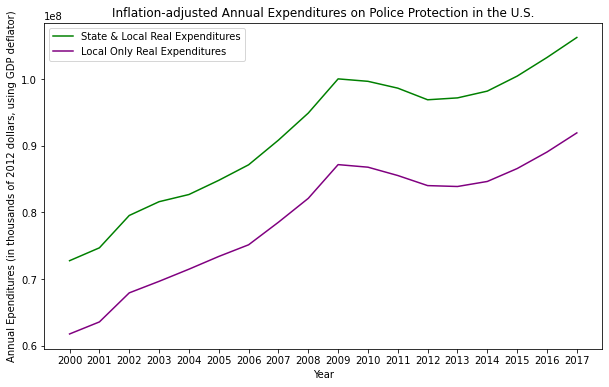

In [16]:
# create line graph

plt.figure(figsize=(10,6))
plt.title('Inflation-adjusted Annual Expenditures on Police Protection in the U.S.')
plt.xlabel('Year')
plt.ylabel('Annual Ependitures (in thousands of 2012 dollars, using GDP deflator)')

plt.plot(t01combined['Year'], t01combined['RealExpend(S&L)'], label='State & Local Real Expenditures', color='green')
plt.plot(t01combined['Year'], t01combined['RealExpend(L)'], label='Local Only Real Expenditures', color='purple')

plt.legend(loc='best')

plt.savefig('charts/slgeppus/RealAnnualExpenditures', bbox_inches='tight')

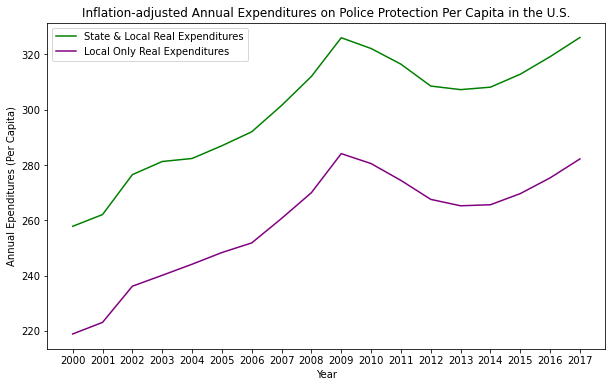

In [17]:
plt.figure(figsize=(10,6))
plt.title('Inflation-adjusted Annual Expenditures on Police Protection Per Capita in the U.S.')
plt.xlabel('Year')
plt.ylabel('Annual Ependitures (Per Capita)')

plt.plot(t01combined['Year'], t01combined['RealExpendPerCapita(S&L)'], label='State & Local Real Expenditures', color='green')
plt.plot(t01combined['Year'], t01combined['RealExpendPerCapita(L)'], label='Local Only Real Expenditures', color='purple')

plt.legend(loc='best')

plt.savefig('charts/slgeppus/RealAnnualExpendituresPerCapita', bbox_inches='tight')

### Table 2. Real (inflation-adjusted) local government expenditures on police protection in the 25 most populous cities of the U.S., 2000-2017 (slgeppus0017t02.csv)

In [18]:
t02df = pd.read_csv('data/slgeppus0017/slgeppus0017t02.csv', engine='python', skiprows=11, skipfooter=4, encoding='Windows-1252')

In [19]:
t02df.head()

,City/a,2000 population,2017 population,2000,2017,"Percent change, 2000-2017/b",Unnamed: 6,Unnamed: 7,2000.1,Unnamed: 9,2017.1,Unnamed: 11,"Percent change, 2000-2017/b.1",Unnamed: 13
0,"New York, NY","8,008,278","8,438,271",$515.75,$625.02,21.19,%,NaN,7.35,%,5.67,%,-22.88,%
1,"Los Angeles, CA","3,694,820","3,982,002",$344.31,$511.17,48.46,%,NaN,19.09,%,22.81,%,19.47,%
2,"Chicago, IL","2,896,016","2,713,067",$488.59,$497.96,1.92,%,NaN,22.99,%,18.74,%,-18.48,%
3,"Houston, TX","1,953,631","2,317,445",$264.51,$291.61,10.25,%,NaN,19.35,%,17.92,%,-7.40,%
4,"Phoenix, AZ","1,321,045","1,634,984",$256.55,$257.28,0.28,%,NaN,15.02,%,18.72,%,24.61,%


In [20]:
t02df.dtypes

City/a                            object
2000 population                   object
2017 population                   object
2000                              object
2017                              object
Percent change, 2000-2017/b      float64
Unnamed: 6                        object
Unnamed: 7                       float64
2000.1                           float64
Unnamed: 9                        object
2017.1                           float64
Unnamed: 11                       object
Percent change, 2000-2017/b.1    float64
Unnamed: 13                       object
dtype: object

In [21]:
colnames2 = {'City/a': 'City', '2000 population': '2000Pop', '2017 population': '2017Pop', '2000': '2000RealLocGovExpend',
            '2017': '2017RealLocGovExpend', 'Percent change, 2000-2017/b': '%change2000-2017', 'Unnamed: 6': 'Unnamed: 6',
            'Unnamed: 7': 'Unnamed: 7', '2000.1': '2000.1', 'Unnamed: 9': 'Unnamed: 9', '2017.1': '2017.1', 
            'Unnamed: 11': 'Unnamed: 11', 'Percent change, 2000-2017/b.1': '%change2000-2017/.1', 'Unnamed: 13': 'Unnamed: 13'}

t02df.columns = t02df.columns.to_series().map(colnames2)

dropcols2 = ['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13']
t02df = t02df.drop(dropcols2, axis=1)

In [22]:
t02df['2000Pop'] = t02df['2000Pop'].map(lambda x: x.replace(',', ''))
t02df['2000Pop'] = t02df['2000Pop'].astype(int)

t02df['2017Pop'] = t02df['2017Pop'].map(lambda x: x.replace(',', ''))
t02df['2017Pop'] = t02df['2017Pop'].astype(int)

t02df['2000RealLocGovExpend'] = t02df['2000RealLocGovExpend'].map(lambda x: x.lstrip('$').replace(',', ''))
t02df['2000RealLocGovExpend'] = t02df['2000RealLocGovExpend'].astype(float)

t02df['2017RealLocGovExpend'] = t02df['2017RealLocGovExpend'].map(lambda x: x.lstrip('$').replace(',', ''))
t02df['2017RealLocGovExpend'] = t02df['2017RealLocGovExpend'].astype(float)

In [23]:
t02df

,City,2000Pop,2017Pop,2000RealLocGovExpend,2017RealLocGovExpend,%change2000-2017,2000.1,2017.1,%change2000-2017/.1
0,"New York, NY",8008278,8438271,515.75,625.02,21.19,7.35,5.67,-22.88
1,"Los Angeles, CA",3694820,3982002,344.31,511.17,48.46,19.09,22.81,19.47
2,"Chicago, IL",2896016,2713067,488.59,497.96,1.92,22.99,18.74,-18.48
3,"Houston, TX",1953631,2317445,264.51,291.61,10.25,19.35,17.92,-7.40
4,"Phoenix, AZ",1321045,1634984,256.55,257.28,0.28,15.02,18.72,24.61
5,"Philadelphia, PA",1517550,1580221,387.85,395.31,1.92,10.97,9.93,-9.47
6,"San Antonio, TX",1144646,1511409,194.50,238.85,22.80,16.25,17.11,5.29
7,"San Diego, CA",1223400,1414427,285.27,208.98,-26.74,15.56,12.50,-19.65
8,"Dallas, TX",1188580,1343087,224.66,283.79,26.32,13.45,12.70,-5.61
9,"San Jose, CA",894943,1032136,233.61,219.96,-5.85,14.34,15.85,10.52
